In [1]:
import numpy as np         #linear algebra
import pandas as pd     #data processing, for CSV file i/o
import os

from subprocess import check_output   # to start a process in python using check_output function call

df = pd.read_csv(r"C:\Users\anike\Documents\certificates & courses\Financial distress 2\Financial Distress.csv")
df.head()


,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [2]:
print(df.Company.unique().shape) # to get how many unique companies are there, which is 422

(422,)


There are 422 company numbers in the dataframe with financial data given as short time series for each company. In this notebook the time information is ignored and every row is treated as an independent data point.

Below, we will examine correlation of variables with Finacial Distress measurement: 

In [22]:
print(df.x80.unique().shape)
corrDf = df.drop(labels = ['Time','Company'], axis = 1).corr().abs()
corrDf.sort_values(by = 'Financial Distress', inplace=True, ascending = False)
corrColumns = corrDf.drop(labels=['x80']).index.values #[corrDf['Financial Distress'] > 0.01]
corrDf.head(n = 10)

(37,)


,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
Financial Distress,1.000000,0.030928,0.272978,0.089264,0.116837,0.274435,0.077260,0.042412,0.006382,0.219091,...,0.018746,0.110030,0.113511,0.096058,0.013891,0.116661,0.048210,0.442916,0.010369,0.007209
x81,0.442916,0.053595,0.281884,0.111055,0.203058,0.266739,0.101647,0.064812,0.000214,0.181116,...,0.002413,0.159350,0.162778,0.134828,0.020161,0.122266,0.039511,1.000000,0.006151,0.001491
x48,0.435318,0.039251,0.249237,0.092989,0.201250,0.237494,0.083978,0.050854,0.001069,0.167506,...,0.013017,0.125823,0.129920,0.112184,0.030507,0.099717,0.040592,0.965758,0.001350,0.016606
x25,0.376786,0.043398,0.483282,0.083522,0.225023,0.461038,0.076557,0.061415,0.001520,0.454145,...,0.016200,0.063416,0.070655,0.074821,0.021393,0.098081,0.048746,0.920063,0.054106,0.031691
x10,0.338298,0.296670,0.735503,0.661908,0.064635,0.645829,0.441091,0.290069,0.007163,0.314260,...,0.023920,0.285670,0.287692,0.219425,0.006016,0.194802,0.008841,0.395664,0.021740,0.001147
x5,0.274435,0.109543,0.892480,0.356252,0.194218,1.000000,0.236113,0.110410,0.011965,0.687468,...,0.000850,0.003010,0.005078,0.018191,0.039424,0.120217,0.032084,0.266739,0.144725,0.067050
x2,0.272978,0.208851,1.000000,0.504509,0.114046,0.892480,0.298078,0.214098,0.014020,0.729858,...,0.014677,0.010825,0.019887,0.034792,0.009057,0.104102,0.002707,0.281884,0.144404,0.095881
x53,0.245600,0.101277,0.798938,0.296368,0.315602,0.906145,0.255941,0.092646,0.014444,0.617102,...,0.005526,0.005084,0.011973,0.023031,0.021684,0.100456,0.023463,0.234532,0.128262,0.063288
x9,0.219091,0.000506,0.729858,0.030976,0.135739,0.687468,0.005126,0.019448,0.028458,1.000000,...,0.030241,0.144849,0.135572,0.077605,0.001246,0.005528,0.036929,0.181116,0.126204,0.078322
x51,0.191357,0.067987,0.197861,0.019216,0.320267,0.236526,0.096300,0.037694,0.066608,0.121566,...,0.027627,0.385481,0.383686,0.325339,0.139066,0.099769,0.067843,0.223139,0.009740,0.038543


'x80' is dropped because it is a categorical variable with 37(lowest) distinct values.(Categorical variables are variables in the data set that unlike continuous variables take a finite set of values. For example, grades that students are given by a teacher for assignments (A, B, C, D, E, and F))
It needs to be one hot encoded to work with classifiers. 
Some more variables can be dropped and only the top few can be retained but right now the number of variables is manageable so take all of them. 
When 'x80' is encoded some of these can be dropped based on the correlation.

In [23]:
reducedDf = df[corrColumns]
reducedDf.head()

,Financial Distress,x81,x48,x25,x10,x5,x2,x53,x9,x51,...,x32,x83,x65,x8,x38,x57,x34,x66,x17,x35
0,0.010636,0.060390,1174.90,214.760,0.006449,0.060940,0.022934,0.180900,0.182790,12.837,...,0.28922,49,34.6920,0.018854,0.015016,0.109900,2.5825,30.087,2.1984,77.400
1,-0.455970,0.010636,1062.50,38.242,0.001795,-0.014080,0.006454,0.056298,0.035991,12.881,...,0.41561,50,124.7600,0.006423,0.027425,0.369330,2.6033,26.124,2.4575,95.947
2,-0.325390,-0.455970,651.15,-498.390,-0.054324,0.020476,-0.059379,0.047562,-0.765400,12.909,...,0.50356,51,6.4467,-0.081423,0.017270,0.053299,1.4931,30.245,1.3957,144.670
3,-0.566570,-0.325390,703.04,-75.867,-0.065316,0.076037,-0.015229,0.101350,-0.107910,13.094,...,0.67133,52,-21.9070,-0.018807,0.014327,0.073356,2.3533,34.285,2.0588,219.750
4,1.357300,1.251000,2465.40,1423.100,0.094075,0.199960,0.107020,0.222370,0.577250,11.396,...,0.68143,27,34.6920,0.128030,0.008152,1.229100,4.1296,30.087,3.0311,222.650


In [24]:
print(type(reducedDf))

<class 'pandas.core.frame.DataFrame'>


reducedDf contains only Financial Distress measure and the features we will be working with. 

FEATURE SCALING:
Features should be scaled using standard scaler before using them for training or testing.

In [27]:
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = StandardScaler()
trainArray = reducedDf.to_numpy()
scaledData = trainArray
scaledData[:,1:] = scaler.fit_transform(trainArray[:,1:])   #all rows and excluding 0th column


print(scaledData[:,1:])



[[-0.39008035 -0.44722129 -0.42869797 ...  0.29953994 -0.03414717
  -0.02943443]
 [-0.40874018 -0.48561686 -0.52556044 ... -0.3452527  -0.03414286
  -0.0294265 ]
 [-0.58373692 -0.62613299 -0.82003184 ...  0.32524704 -0.0341605
  -0.02940565]
 ...
 [-0.23180522 -0.27160601 -0.2855866  ...  1.72091478 -0.0335352
  -0.02936418]
 [-0.22491945 -0.26535478 -0.29573828 ... -0.9618977  -0.03352478
  -0.02935624]
 [-0.18356734 -0.22750577 -0.26940974 ...  0.28912694 -0.03393432
  -0.02910372]]


Examine imbalance in the dataset. Only ~5 % are distressed 

In [30]:
print(np.sum(scaledData[:,0] > -0.5)) # 3281 healthy
print(np.sum(scaledData[:,0] <= -0.5)) # 391 distressed cases


3536
136


Plotting to see all features if distribution is good. 
It Looks reasonable.

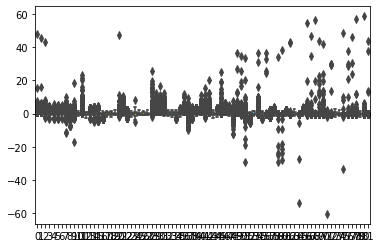

In [10]:
import seaborn as sns
sns.boxplot(data = scaledData[:,1:])

Since the data is imabalanced we should focus on precision, recall and FScore rather than relying on accuracy.  

Peform a linear regression to predict Financial Distress value and then predict if it is distressed or not using a threshold on the predicted distress metric.

Text(0, 0.5, 'Precision')

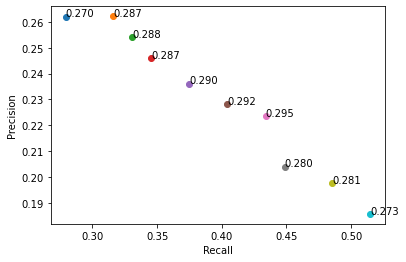

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

uniformData = scaledData
X = uniformData[:,1:]
y = uniformData[:,0]
y_discrete = (uniformData[:,0] < -0.5).astype(int)

mdl = LinearRegression()

thresholds = np.arange(-1.5,-0.5,0.1) # Try some thresholds
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1_scores = np.zeros_like(thresholds)
predicted_metric = cross_val_predict(mdl, X, y, cv = 5)
fig, ax = plt.subplots()
for i in range(len(thresholds)):
    predicted = (predicted_metric < thresholds[i]).astype(int)
    precisions[i] = precision_score(y_discrete, predicted)
    recalls[i] = recall_score(y_discrete, predicted)
    f1_scores[i] = f1_score(y_discrete, predicted)
    plt.scatter(recalls[i], precisions[i])
    ax.annotate('%0.3f' % (f1_scores[i]),(recalls[i], precisions[i]))
plt.xlabel('Recall')    
plt.ylabel('Precision')



Text(0, 0.5, 'Precision')

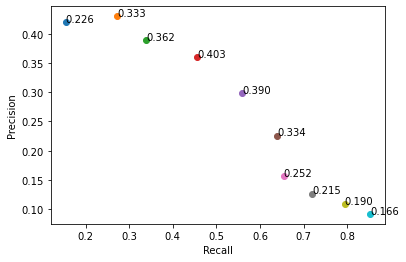

In [17]:
mdl = svm.SVR()
thresholds = np.arange(-0.5,0.5,0.1) # Try some thresholds
precisions = np.zeros_like(thresholds)
recalls = np.zeros_like(thresholds)
f1_scores = np.zeros_like(thresholds)
predicted_metric = cross_val_predict(mdl, X, y, cv = 5)
fig, ax = plt.subplots()
for i in range(len(thresholds)):
    predicted = (predicted_metric < thresholds[i]).astype(int)
    precisions[i] = precision_score(y_discrete, predicted)
    recalls[i] = recall_score(y_discrete, predicted)
    f1_scores[i] = f1_score(y_discrete, predicted)
    plt.scatter(recalls[i], precisions[i])
    ax.annotate('%0.3f' % (f1_scores[i]),(recalls[i], precisions[i]))
plt.xlabel('Recall')    
plt.ylabel('Precision')

Linear model gives a best Fscore of 0.295 and SVR improves it to ~0.4. Now we turn to some classifiers to run this task as a pure classification job

To run the data through classifiers we should use StratifiedKFold because it ensures that the proportion of classes remains almost constant across splits. Also classifiers have a parameter named 'class_weight' which can be set to 'balanced' to weigh the observations by their support. 


In [18]:
from sklearn.model_selection import StratifiedKFold

Let's define a wrapper function which does the classification using StratifiedKFold CV and returns predicted probability for each observation. This function should also be able to plot the confusion matrix for different threshold levels.

In [19]:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def cvClassifier(mdl, X, y, color, name, confMat = False, confMatNormalize = True):
    skf = StratifiedKFold(n_splits = 5)
    predicted_prob = np.zeros_like(y, dtype = float)
    for train,test in skf.split(X, y):
        mdl.fit(X[train,:],y[train])
        y_prob = mdl.predict_proba(X[test,:])
        predicted_prob[test] = y_prob[:,1] #The second class 1 from 0,1 is the one to be predicted
    
    precision, recall, thresholds = precision_recall_curve(y, predicted_prob)
    plt.plot(recall, precision, color=color,label = name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve')
    plt.legend()
    
    fscore = 2*(precision*recall)/(precision + recall)
    maxFidx = np.nanargmax(fscore)
    selP = precision[maxFidx]
    selRecall = recall[maxFidx]
    selThreshold = thresholds[maxFidx]

    return predicted_prob, selP, selRecall, fscore[maxFidx], selThreshold

Now we can try some classifier using the function defined above. We should use only classifiers with a class_weight parameter available since only they can compensate for the imbalance in the dataset. The selection criterion is to maximize F score. 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

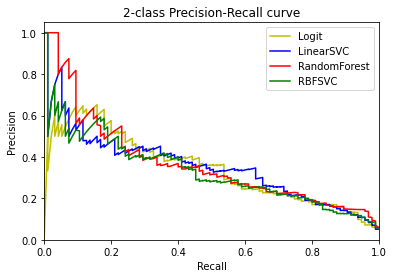

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.3, stratify=y_discrete, random_state=42)

mdl = LogisticRegression(class_weight = 'balanced')
out1 = cvClassifier(mdl, X_train, y_train, 'y','Logit')

mdl = svm.SVC(kernel = 'linear', C=0.025, class_weight = 'balanced', probability = True)
out2 = cvClassifier(mdl, X_train, y_train, 'b','LinearSVC')

mdl = RandomForestClassifier(class_weight = 'balanced', n_estimators=1000)
out3 = cvClassifier(mdl, X_train, y_train, 'r','RandomForest')

mdl = svm.SVC(C=0.5, class_weight = 'balanced', probability = True)
out4 = cvClassifier(mdl, X_train, y_train, 'g','RBFSVC')

All the classifiers are performing very closely. If the FScore numbers don't vary by a lot we should use the simplest model (Logit or LinearSVC).

We can now examine the best Fscores from different models and the precision recall associated with the scores.

(0.35, 0.65)

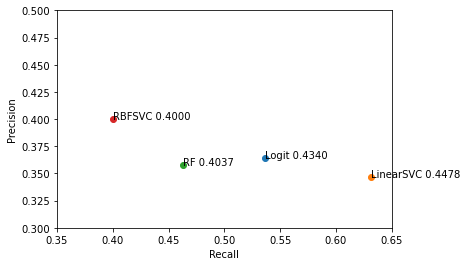

In [21]:
results = [out1, out2, out3, out4]
mdlNames = ['Logit','LinearSVC','RF','RBFSVC']
fig, ax = plt.subplots()
for i in range(len(results)):
    ax.scatter(results[i][2],results[i][1])
    ax.annotate('%s %0.4f' % (mdlNames[i], results[i][3]),(results[i][2],results[i][1]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.3, 0.5])
plt.xlim([0.35, 0.65])

LinearSVC has the highest F score and at the highest recall value. For this problem it's good to have a model with a better recall.

In [22]:
threshold = out2[4]
y_pred = (out2[0] > threshold).astype(int)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred)
print('Accuracy %0.2f' % (acc))
print('Threshold %0.3f' % (threshold))

Accuracy 0.94
Threshold 0.144


Now we can try the LinearSVC model with the hold out test set.

Accuracy 0.93
Precision 0.28
Recall 0.54


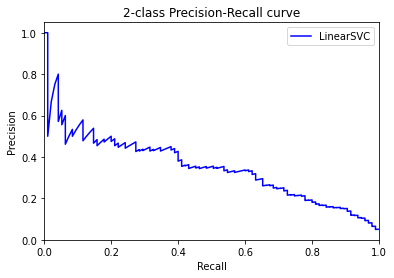

In [23]:
mdl = svm.SVC(kernel = 'linear', C=0.025, class_weight = 'balanced', probability = True)
out2 = cvClassifier(mdl, X_train, y_train, 'b','LinearSVC')

y_testp = (mdl.predict_proba(X_test)[:,1] > threshold).astype(int)
acc = accuracy_score(y_test, y_testp)
print('Accuracy %0.2f' % (acc))
print('Precision %0.2f' % (precision_score(y_test,y_testp)))
print('Recall %0.2f' % (recall_score(y_test,y_testp)))